In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import pi, e, hbar, m_e, c, epsilon_0
from particles import beamParameters_inSingleRun


# IMPORTANT - import from own scripts in different directories
# ############################################################
h5data_process    = os.path.join("C:\\", "Users", "u55266hs", "OneDrive - The University of Manchester", "coding", "visualize_qv3d", "h5data_process")
sys.path.append(h5data_process) # add the directory path into the memory where includes particles.py
from func import find_folders_with_pattern
#from from_input_deck import extract_value_from_input_deck

# Constants
# #########
E0 = 0.5110e6  # [eV] electron rest energy

# Plot optoins
# ############
fontsize = 12
fontsize14 = 14
figsize = (7, 4)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'navy'] # Define colors for plotting # in windows

# Enter simulation directory
# ###########################
#simulation_path = "/home/novac/Desktop/Projects/autorun_qv3d/temp/density-5.0e15"  # in linux
simulation_path = os.path.join("C:\\", "Users", "u55266hs", "OneDrive - The University of Manchester", "coding", "SCARF", "clara_plasmaScan_2beam")  # in windows
density_scan_dir_paths = find_folders_with_pattern(simulation_path, 'density')

In [13]:
all_beamdf = []
all_densities = []
all_Ewb = []
for sim_dir in density_scan_dir_paths:
    csvFile = os.path.join(sim_dir, "h5files", "witness_parameters.csv")
    beam_df, keys, n0, Ewb, lamdap = beamParameters_inSingleRun(csvFile)
    all_beamdf.append(beam_df)
    all_densities.append(n0)
    all_Ewb.append(Ewb)

In [14]:
keys

['position [cm]',
 'energy [MeV]',
 'energySpread [%]',
 'charge [pC]',
 'emittance [mm-mrad]']

In [15]:
all_position = []
all_energy = []
all_energySpread = []
all_charge = []
all_emittance = []

for df in all_beamdf:
    position = df['position [cm]']
    energy = df['energy [MeV]']
    energySpread = df['energySpread [%]']
    charge = df['charge [pC]']
    emittance = df['emittance [mm-mrad]']
    
    # print initial emittance
    # #######################
    print(emittance[0])

    all_position.append(position)
    all_energy.append(energy)
    all_energySpread.append(energySpread)
    all_charge.append(charge)
    all_emittance.append(emittance)
    

5.795383152415377
5.762507681626117
5.304549535050079
5.301065155438103
5.384694750707787
5.330147447566531
5.279870047662158
5.05257284642191
5.053630510524092
5.083178696219522
5.065787707198161
5.027534385859534
5.063781697605061
5.029071240060136
5.060485940302572
5.0568652762754125
5.02253349744927
5.033103956019586
5.025883488900235
5.0218179005415955
5.033389976149275


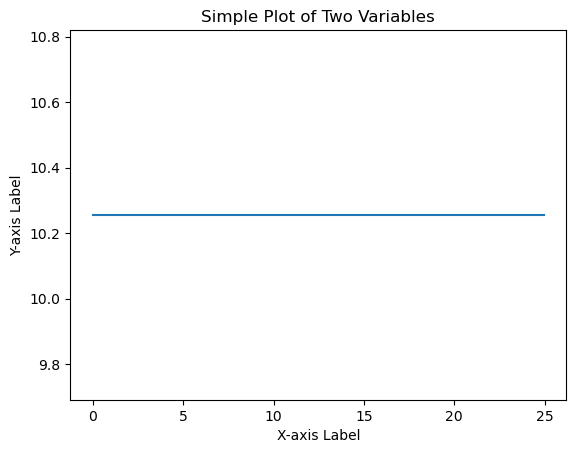

In [19]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(all_position[0], all_charge[0])

# Add labels and title
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_title('Simple Plot of Two Variables')

# Show the plot
plt.show()